In [1]:
#导入sklearn.ensemble.GradientBoostingClassifier, train_test_split, matplotlib, numpy, pandas模块
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [2]:
#处理数据
datas = pd.read_csv(r'E:\other\doing_data_science-master\doing_data_science-master\doing_data_science-master\dds_datasets\dds_datasets\dds_ch2_nyt\nyt1.csv')
data = datas.drop(index=datas[datas.Signed_In==0].index)
data = data.drop(["Signed_In"], axis=1)
X, y = data.loc[:, ["Age", "Gender", "Impressions"]], data.loc[:, "Clicks"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [8]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth = 1, learning_rate=0.01, n_estimators=100).fit(X_train, y_train)
#计算模型的预测精度
print("训练集上的准确率：{:.3f}".format(gbrt.score(X_train, y_train)))
print("测试集上的准确率：{:.3f}".format(gbrt.score(X_test, y_test)))

训练集上的准确率：0.931
测试集上的准确率：0.931


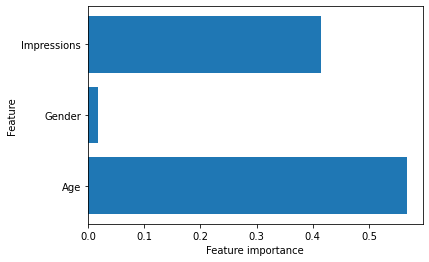

In [7]:
#特征重要性可视化
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(gbrt)